In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


#### Load and explore the data

In [4]:
filename= 'caribbean.csv'

In [5]:
#Read csv
headers_=['Country','City']
df = pd.read_csv(filename, delimiter=';', names=headers_)
df.head(10)

,Country,City
0,Anguilla,The Valley
1,Antigua and Barbuda,Saint John’s
2,Aruba,Angochi
3,Aruba,Babijn
4,Aruba,Oranjestad
5,Bahamas,Freeport
6,Bahamas,Nassau
7,Barbados,Bridgetown
8,Bermuda,Hamilton
9,Bonaire,Kralendijk


In [6]:
df.shape

(284, 2)

#### Use geopy library to get the latitude and longitude values of the Caribbean cities.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>cb_explorer</em>, as shown below.

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="cb_explorer")

geocoor=[]

for cou, city in zip(df['Country'], df['City']):
    address1=city+', '+cou
    location = geolocator.geocode(address1)
    geocoor.append([location.latitude, location.longitude])

In [82]:
geocoor[0:5]

[[18.2145861, -63.0517759],
 [17.1184569, -61.8448509],
 [12.5204603, -69.9640531],
 [12.5409466, -69.9958156],
 [12.5268736, -70.0356845]]

#### Tranform the data into a *pandas* dataframe

In [9]:
df_geocoor=pd.DataFrame(geocoor,columns=['Latitude','Longitude'])
df_geocoor.head()

,Latitude,Longitude
0,18.214586,-63.051776
1,17.118457,-61.844851
2,12.520460,-69.964053
3,12.540947,-69.995816
4,12.526874,-70.035685


#### Add *df_geocoor* dataframe to *df* one

In [10]:
df=df.join(df_geocoor)
df.head(10)

,Country,City,Latitude,Longitude
0,Anguilla,The Valley,18.214586,-63.051776
1,Antigua and Barbuda,Saint John’s,17.118457,-61.844851
2,Aruba,Angochi,12.520460,-69.964053
3,Aruba,Babijn,12.540947,-69.995816
4,Aruba,Oranjestad,12.526874,-70.035685
5,Bahamas,Freeport,26.535681,-78.695362
6,Bahamas,Nassau,25.078346,-77.338333
7,Barbados,Bridgetown,13.097783,-59.618418
8,Bermuda,Hamilton,32.295608,-64.782705
9,Bonaire,Kralendijk,12.147174,-68.274078


In [11]:
address = 'Caribbean'

geolocator = Nominatim(user_agent="cb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Caribbean are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Caribbean are 18.4, -75.0.


#### A map of the Caribbean region

In [12]:
# create map of the Caribbean using latitude and longitude values
map_caribbean = folium.Map(location=[latitude, longitude], zoom_start=5)

map_caribbean

#### Create a map of the Caribbean with the cities superimposed on top.

In [13]:
# create map of the Caribbean using latitude and longitude values
map_caribbean = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_caribbean)  
    
map_caribbean

#### Define Foursquare Credentials and Version

In [14]:
# de bernas
CLIENT_ID = 'WO4P5JIWGIZ0ZQZRPOOZIFQQYQ0V2YVC4KBGIOZBVSOVTSFW' # your Foursquare ID
CLIENT_SECRET = '2MOCOOHGJWSU4PTZZ0TJ4XOYQSLL31FDWTRSDPL1LROC5B43' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WO4P5JIWGIZ0ZQZRPOOZIFQQYQ0V2YVC4KBGIOZBVSOVTSFW
CLIENT_SECRET:2MOCOOHGJWSU4PTZZ0TJ4XOYQSLL31FDWTRSDPL1LROC5B43


#### Let's explore the first city in our dataframe.

Get the city's name.

In [15]:
df.loc[0, 'City']

'The Valley'

In [16]:
city_latitude = df.loc[0, 'Latitude'] # city latitude value
city_longitude = df.loc[0, 'Longitude'] # city longitude value

city_name = df.loc[0, 'City'] # city name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of The Valley are 18.2145861, -63.0517759.


#### Now, let's get the top 100 venues that are in radius of 2500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [17]:
# type your answer here

LIMIT=100 # limit of number of venues returned by Foursquare API
radius= 25000 # define radius [m]

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=WO4P5JIWGIZ0ZQZRPOOZIFQQYQ0V2YVC4KBGIOZBVSOVTSFW&client_secret=2MOCOOHGJWSU4PTZZ0TJ4XOYQSLL31FDWTRSDPL1LROC5B43&v=20180605&ll=18.2145861,-63.0517759&radius=25000&limit=100'

Send the GET request and examine the resutls

In [18]:
results = requests.get(url).json()
#results

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Shoal Bay Beach,Beach,18.254033,-63.031663
1,Veya,Caribbean Restaurant,18.201734,-63.079456
2,Gwen's Reggae Bar & Grill,Caribbean Restaurant,18.252853,-63.034531
3,Roy's Bayside Grill,Steakhouse,18.197958,-63.091111
4,Tasty's,Caribbean Restaurant,18.196671,-63.084617
5,Sandy Ground Anguilla,Beach,18.201715,-63.090445
6,Da Vida,Caribbean Restaurant,18.219870,-63.066997
7,Pumphouse,Pub,18.202669,-63.090122
8,Jacala,French Restaurant,18.184076,-63.135961
9,Sun Shine Shack,Bar,18.177536,-63.113524


And how many venues were returned by Foursquare?

In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## 2. Explore Cities in Caribbean 

#### Let's create a function to repeat the same process to all the cities in Caribbean

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each city and create a new dataframe called *caribbean_venues*.

In [23]:
# type your answer here

caribbean_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



The Valley
Saint John’s
Angochi
Babijn
Oranjestad
Freeport
Nassau
Bridgetown
Hamilton
Kralendijk
Road Town
George Town
Abreus
Aguada de Pasajeros
Alamar
Alquízar
Amancio
Arroyo Naranjo
Artemisa
Báguanos
Bahía Honda
Banes
Baracoa
Baraguá
Bartolomé Masó
Bauta
Bayamo
Bejucal
Boyeros
Cabaiguán
Cacocum
Caibarién
Calimete
Camagüey
Camajuaní
Campechuela
Cárdenas
Cauto Cristo
Centro Habana
Cerro
Chambas
Ciego de Ávila
Cienfuegos
Cifuentes
Ciro Redondo
Colombia Las Tunas
Colón
Condado
Consolación del Sur
Contramaestre
Corralillo
Cruces
Cueto
Cumanayagua
Diez de Octubre
Encrucijada
Esmeralda
Florencia
Florida
Fomento
Gibara
Guáimaro
Guanabacoa
Guanajay
Guane
Guantánamo
Güines
Güira de Melena
Guisa
Habana del Este
Havana
Holguín
Jagüey Grande
Jaruco
Jatibonico
Jesús Menéndez
Jiguaní
Jimaguayú
Jobabo
Jovellanos
La Habana Vieja
La Salud
La Sierpe
Las Tunas
Los Palacios
Madruga
Maisí
Manicaragua
Manzanillo
Mariel
Matanzas
Media Luna
Minas
Minas de Matahambre
Moa
Morón
Niquero
Nueva Gerona
Nuevitas
P

#### Let's check the size of the resulting dataframe

In [24]:
print(caribbean_venues.shape)
caribbean_venues.head(10)

(11519, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Valley,18.214586,-63.051776,Shoal Bay Beach,18.254033,-63.031663,Beach
1,The Valley,18.214586,-63.051776,Veya,18.201734,-63.079456,Caribbean Restaurant
2,The Valley,18.214586,-63.051776,Gwen's Reggae Bar & Grill,18.252853,-63.034531,Caribbean Restaurant
3,The Valley,18.214586,-63.051776,Roy's Bayside Grill,18.197958,-63.091111,Steakhouse
4,The Valley,18.214586,-63.051776,Tasty's,18.196671,-63.084617,Caribbean Restaurant
5,The Valley,18.214586,-63.051776,Sandy Ground Anguilla,18.201715,-63.090445,Beach
6,The Valley,18.214586,-63.051776,Da Vida,18.219870,-63.066997,Caribbean Restaurant
7,The Valley,18.214586,-63.051776,Pumphouse,18.202669,-63.090122,Pub
8,The Valley,18.214586,-63.051776,Jacala,18.184076,-63.135961,French Restaurant
9,The Valley,18.214586,-63.051776,Sun Shine Shack,18.177536,-63.113524,Bar


Let's check how many venues were returned for each city

In [25]:
caribbean_venues.groupby('City').count().head()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Abreus,5,5,5,5,5,5
Aguada de Pasajeros,1,1,1,1,1,1
Aguadilla,100,100,100,100,100,100
Alamar,100,100,100,100,100,100
Alquízar,5,5,5,5,5,5


#### Let's find out how many unique categories can be curated from all the returned venues

In [26]:
print('There are {} uniques categories.'.format(len(caribbean_venues['Venue Category'].unique())))

There are 320 uniques categories.


## 3. Analyze Each City

In [27]:
# one hot encoding
caribbean_onehot = pd.get_dummies(caribbean_venues[['Venue Category']], prefix="", prefix_sep="")
caribbean_onehot.head()

,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dive Shop,Dive Spot,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Port,Post Office,Pub,Public Art,Racetrack,Radio Station,Rafting,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Food Gathering,Summer Camp,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attractio

In [28]:
# add cities column back to dataframe
caribbean_onehot['Cities'] = caribbean_venues['City'] 

# move cities column to the first column
fixed_columns = [caribbean_onehot.columns[-1]] + list(caribbean_onehot.columns[:-1])
caribbean_onehot = caribbean_onehot[fixed_columns]

caribbean_onehot.head(10)

,Cities,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dive Shop,Dive Spot,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Port,Post Office,Pub,Public Art,Racetrack,Radio Station,Rafting,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Food Gathering,Summer Camp,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / At

And let's examine the new dataframe size.

In [29]:
caribbean_onehot.shape

(11519, 321)

#### Next, let's group rows by cities and by taking the mean of the frequency of occurrence of each category

In [30]:
caribbean_grouped = caribbean_onehot.groupby('Cities').mean().reset_index()
caribbean_grouped.head()

,Cities,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dive Shop,Dive Spot,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Port,Post Office,Pub,Public Art,Racetrack,Radio Station,Rafting,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Food Gathering,Summer Camp,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / At

#### Let's confirm the new size

In [31]:
caribbean_grouped.shape

(278, 321)

#### Let's print each city along with the top 5 most common venues

In [32]:
num_top_venues = 5

for hood in caribbean_grouped['Cities']:
    print("----"+hood+"----")
    temp = caribbean_grouped[caribbean_grouped['Cities'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abreus----
       venue  freq
0      Hotel   0.2
1       Pier   0.2
2  Cafeteria   0.2
3      Plaza   0.2
4    Theater   0.2


----Aguada de Pasajeros----
                  venue  freq
0  Caribbean Restaurant   1.0
1    Photography Studio   0.0
2              Pharmacy   0.0
3             Pet Store   0.0
4   Peruvian Restaurant   0.0


----Aguadilla----
                  venue  freq
0  Caribbean Restaurant  0.08
1           Coffee Shop  0.07
2                 Beach  0.07
3        Sandwich Place  0.06
4                Bakery  0.06


----Alamar----
              venue  freq
0             Hotel  0.17
1  Cuban Restaurant  0.15
2             Beach  0.05
3              Park  0.04
4         Hotel Bar  0.04


----Alquízar----
                           venue  freq
0                      BBQ Joint   0.2
1            American Restaurant   0.2
2  Vegetarian / Vegan Restaurant   0.2
3                          Plaza   0.2
4          College Arts Building   0.2


----Amancio----
             venu

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each city.

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cities']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['Cities'] = caribbean_grouped['Cities']

for ind in np.arange(caribbean_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(caribbean_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,Cities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abreus,Plaza,Cafeteria,Hotel,Pier,Theater,Fast Food Restaurant,Empanada Restaurant,Exhibit,Factory,Farm
1,Aguada de Pasajeros,Caribbean Restaurant,Zoo Exhibit,Electronics Store,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
2,Aguadilla,Caribbean Restaurant,Beach,Coffee Shop,Sandwich Place,Bakery,Pizza Place,Surf Spot,Ice Cream Shop,Lighthouse,Resort
3,Alamar,Hotel,Cuban Restaurant,Beach,Park,Hotel Bar,Nightclub,Restaurant,Plaza,Cocktail Bar,Seafood Restaurant
4,Alquízar,Plaza,BBQ Joint,American Restaurant,College Arts Building,Vegetarian / Vegan Restaurant,Fish Market,Exhibit,Factory,Farm,Farmers Market


In [35]:
cities_venues_sorted.head(10)

,Cities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abreus,Plaza,Cafeteria,Hotel,Pier,Theater,Fast Food Restaurant,Empanada Restaurant,Exhibit,Factory,Farm
1,Aguada de Pasajeros,Caribbean Restaurant,Zoo Exhibit,Electronics Store,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
2,Aguadilla,Caribbean Restaurant,Beach,Coffee Shop,Sandwich Place,Bakery,Pizza Place,Surf Spot,Ice Cream Shop,Lighthouse,Resort
3,Alamar,Hotel,Cuban Restaurant,Beach,Park,Hotel Bar,Nightclub,Restaurant,Plaza,Cocktail Bar,Seafood Restaurant
4,Alquízar,Plaza,BBQ Joint,American Restaurant,College Arts Building,Vegetarian / Vegan Restaurant,Fish Market,Exhibit,Factory,Farm,Farmers Market
5,Amancio,Park,Antique Shop,Zoo Exhibit,Fish Market,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
6,Angochi,Beach,Resort,Caribbean Restaurant,Hotel,Grocery Store,Seafood Restaurant,Brazilian Restaurant,Food Court,Bar,Bakery
7,Arecibo,Caribbean Restaurant,Restaurant,Bar,Department Store,Coffee Shop,Pharmacy,Bakery,BBQ Joint,Sandwich Place,Pizza Place
8,Arima,Bakery,Pizza Place,Food Truck,Café,Scenic Lookout,Gym,Ice Cream Shop,Indian Restaurant,Beach,Coffee Shop
9,Arroyo Naranjo,Cuban Restaurant,Park,Southern / Soul Food Restaurant,Zoo Exhibit,Fish & Chips Shop,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant


In [36]:
cities_venues_sorted.isnull().sum()

Cities                    0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

<a id='item4'></a>

## 4. Cluster Cities

Run *k*-means to cluster the cities into 6 clusters.

In [37]:
# set number of clusters
kclusters = 6

caribbean_grouped_clustering = caribbean_grouped.drop('Cities', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(caribbean_grouped_clustering)


In [38]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1, 0, 1, 4, 0, 1, 1,
       1, 1, 4, 1, 0, 1, 4, 1, 1, 1, 4, 1, 1, 0, 4, 4, 1, 4, 1, 4, 4, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 4, 1, 2, 4, 1, 0, 1, 4, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 4, 1, 1, 5, 1, 1, 0, 1, 1, 5, 1, 4, 1, 1, 1, 4, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 4, 1, 0, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 4, 2,
       1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 3, 2,
       1, 1, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 4, 0, 1, 1, 4, 4, 1, 0, 1, 4, 0,
       4, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1], dtype=int32)

In [39]:
kmeans.labels_.size

278

In [40]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each city.

In [41]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
cities_venues_sorted.rename(columns={'Cities':'City'},inplace=True)

In [42]:
cities_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Abreus,Plaza,Cafeteria,Hotel,Pier,Theater,Fast Food Restaurant,Empanada Restaurant,Exhibit,Factory,Farm
1,1,Aguada de Pasajeros,Caribbean Restaurant,Zoo Exhibit,Electronics Store,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
2,1,Aguadilla,Caribbean Restaurant,Beach,Coffee Shop,Sandwich Place,Bakery,Pizza Place,Surf Spot,Ice Cream Shop,Lighthouse,Resort
3,4,Alamar,Hotel,Cuban Restaurant,Beach,Park,Hotel Bar,Nightclub,Restaurant,Plaza,Cocktail Bar,Seafood Restaurant
4,1,Alquízar,Plaza,BBQ Joint,American Restaurant,College Arts Building,Vegetarian / Vegan Restaurant,Fish Market,Exhibit,Factory,Farm,Farmers Market


In [43]:
cities_venues_sorted.shape

(278, 12)

In [44]:
caribbean_merged = df

# merge caribbean_grouped with caribbean_data to add latitude/longitude for each city
caribbean_merged = caribbean_merged.join(cities_venues_sorted.set_index('City'), on='City')

In [45]:
caribbean_merged.head(10) # check the last columns!

,Country,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anguilla,The Valley,18.214586,-63.051776,1.0,Beach,French Restaurant,Resort,Caribbean Restaurant,Bar,Hotel,Italian Restaurant,Seafood Restaurant,Beach Bar,Cocktail Bar
1,Antigua and Barbuda,Saint John’s,17.118457,-61.844851,1.0,Resort,Beach,Caribbean Restaurant,Hotel,Bar,Sandwich Place,Café,Middle Eastern Restaurant,Cocktail Bar,Mediterranean Restaurant
2,Aruba,Angochi,12.520460,-69.964053,1.0,Beach,Resort,Caribbean Restaurant,Hotel,Grocery Store,Seafood Restaurant,Brazilian Restaurant,Food Court,Bar,Bakery
3,Aruba,Babijn,12.540947,-69.995816,1.0,Beach,Resort,Caribbean Restaurant,Hotel,Grocery Store,Seafood Restaurant,Bakery,Chinese Restaurant,Food Court,Sushi Restaurant
4,Aruba,Oranjestad,12.526874,-70.035685,1.0,Beach,Resort,Caribbean Restaurant,Hotel,Seafood Restaurant,Grocery Store,Bakery,Scenic Lookout,Brazilian Restaurant,Food Court
5,Bahamas,Freeport,26.535681,-78.695362,1.0,Resort,Caribbean Restaurant,Beach,Pizza Place,Restaurant,Hotel Bar,Bar,Latin American Restaurant,Grocery Store,Fast Food Restaurant
6,Bahamas,Nassau,25.078346,-77.338333,1.0,Beach,Resort,Caribbean Restaurant,Hotel,Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop,Café,Plaza
7,Barbados,Bridgetown,13.097783,-59.618418,1.0,Beach,Caribbean Restaurant,Café,Resort,Bar,Sandwich Place,Seafood Restaurant,Hotel,Asian Restaurant,Italian Restaurant
8,Bermuda,Hamilton,32.295608,-64.782705,1.0,Restaurant,Beach,Café,Resort,Hotel,Seafood Restaurant,Coffee Shop,Golf Course,Bar,Park
9,Bonaire,Kralendijk,12.147174,-68.274078,1.0,Resort,Beach,Café,Caribbean Restaurant,Bar,Hotel,Surf Spot,BBQ Joint,Beach Bar,Grocery Store


In [46]:
caribbean_merged.shape

(284, 15)

#### Check from missing values

In [47]:
caribbean_merged.isnull().sum()

Country                   0
City                      0
Latitude                  0
Longitude                 0
Cluster Labels            6
1st Most Common Venue     6
2nd Most Common Venue     6
3rd Most Common Venue     6
4th Most Common Venue     6
5th Most Common Venue     6
6th Most Common Venue     6
7th Most Common Venue     6
8th Most Common Venue     6
9th Most Common Venue     6
10th Most Common Venue    6
dtype: int64

Deleting cities with no assigned venue 

In [48]:
caribbean_merged = caribbean_merged[pd.notnull(caribbean_merged["Cluster Labels"])]
caribbean_merged = caribbean_merged.reset_index(drop=True)
caribbean_merged.isnull().sum()

Country                   0
City                      0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

Converting cluster labels type from float to integer 

In [49]:
type(caribbean_merged['Cluster Labels'].values[0])

numpy.float64

In [50]:
caribbean_merged['Cluster Labels']=caribbean_merged['Cluster Labels'].astype(int)

In [51]:
type(caribbean_merged['Cluster Labels'].values[0])

numpy.int64

Finally, let's visualize the resulting clusters

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(caribbean_merged['Latitude'], caribbean_merged['Longitude'], caribbean_merged['City'], caribbean_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 0

In [53]:
cluster0=caribbean_merged.loc[caribbean_merged['Cluster Labels'] == 0, caribbean_merged.columns[[1] + list(range(5, caribbean_merged.shape[1]))]]
cluster0.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Artemisa,Hotel,Nature Preserve,Café,Park,Scenic Lookout,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Exhibit,Factory,Farm
19,Báguanos,Furniture / Home Store,Baseball Stadium,Hotel,Zoo Exhibit,Fish Market,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant
20,Bahía Honda,Hotel,Nature Preserve,Café,Park,Scenic Lookout,Zoo Exhibit,Fast Food Restaurant,Exhibit,Factory,Farm
21,Banes,Hotel,Beach,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
23,Baraguá,Stadium,Baseball Stadium,Hotel,Zoo Exhibit,Fish & Chips Shop,Empanada Restaurant,Exhibit,Factory,Farm,Farmers Market


In [54]:
cluster0.shape

(29, 11)

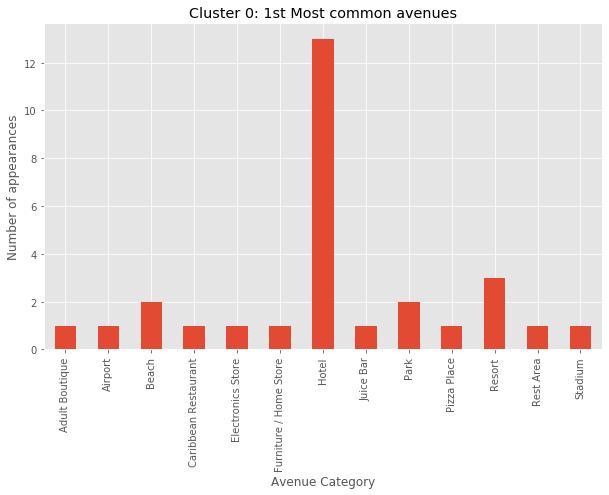

In [55]:
cluster0.groupby('1st Most Common Venue').count()['City'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 0: 1st Most common avenues') # add title to the plot

plt.show()

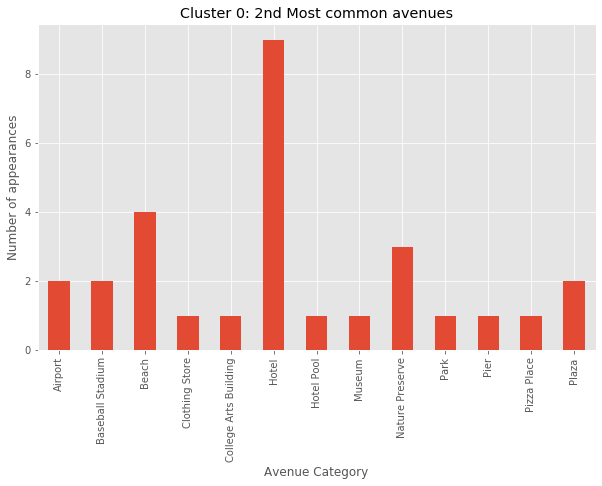

In [56]:
cluster0.groupby('2nd Most Common Venue').count()['City'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 0: 2nd Most common avenues') # add title to the plot

plt.show()

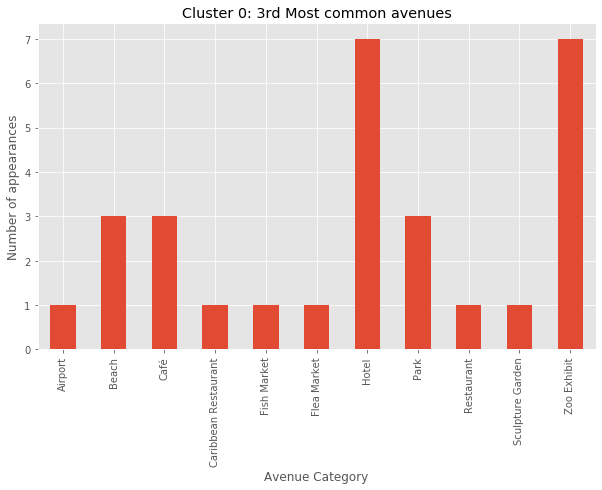

In [57]:
cluster0.groupby('3rd Most Common Venue').count()['City'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 0: 3rd Most common avenues') # add title to the plot

plt.show()

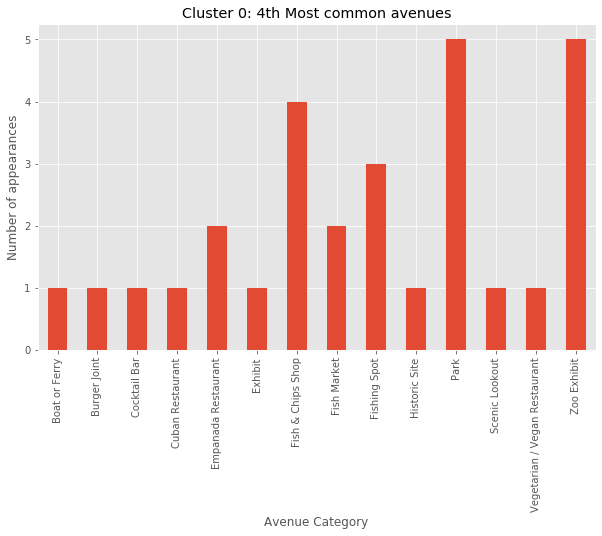

In [58]:
cluster0.groupby('4th Most Common Venue').count()['City'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 0: 4th Most common avenues') # add title to the plot

plt.show()

Cluster 0 is characterized mainly by the big offer of hotels.  Then zoo exhibits and parks.

#### Cluster 1

In [59]:
cluster1=caribbean_merged.loc[caribbean_merged['Cluster Labels'] == 1, caribbean_merged.columns[[1] + list(range(5, caribbean_merged.shape[1]))]]
cluster1.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Valley,Beach,French Restaurant,Resort,Caribbean Restaurant,Bar,Hotel,Italian Restaurant,Seafood Restaurant,Beach Bar,Cocktail Bar
1,Saint John’s,Resort,Beach,Caribbean Restaurant,Hotel,Bar,Sandwich Place,Café,Middle Eastern Restaurant,Cocktail Bar,Mediterranean Restaurant
2,Angochi,Beach,Resort,Caribbean Restaurant,Hotel,Grocery Store,Seafood Restaurant,Brazilian Restaurant,Food Court,Bar,Bakery
3,Babijn,Beach,Resort,Caribbean Restaurant,Hotel,Grocery Store,Seafood Restaurant,Bakery,Chinese Restaurant,Food Court,Sushi Restaurant
4,Oranjestad,Beach,Resort,Caribbean Restaurant,Hotel,Seafood Restaurant,Grocery Store,Bakery,Scenic Lookout,Brazilian Restaurant,Food Court


In [60]:
cluster1.shape

(190, 11)

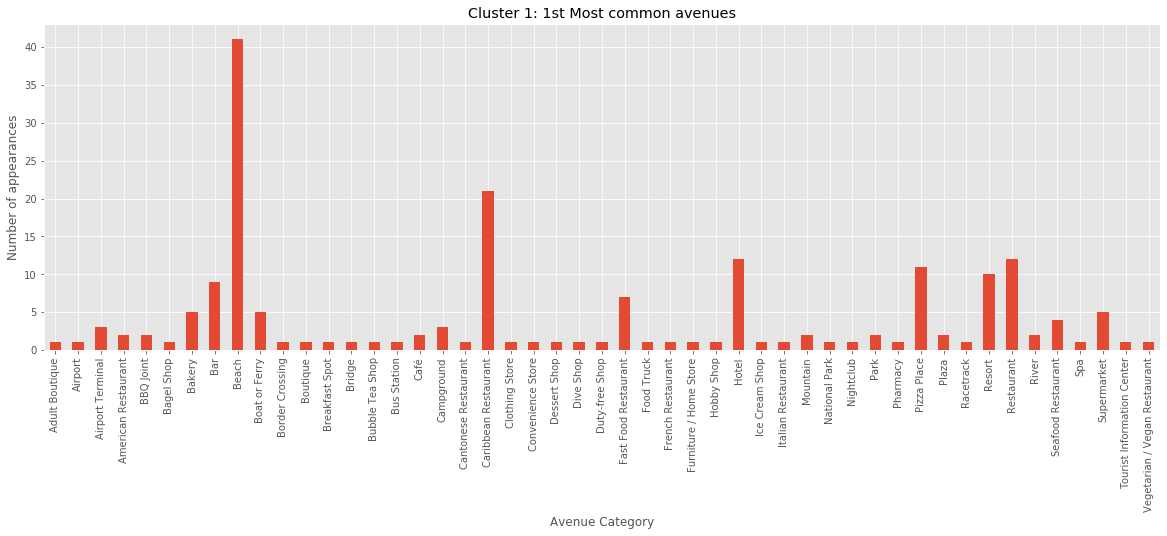

In [61]:
cluster1.groupby('1st Most Common Venue').count()['City'].plot(kind='bar', figsize=(20, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 1: 1st Most common avenues') # add title to the plot

plt.show()

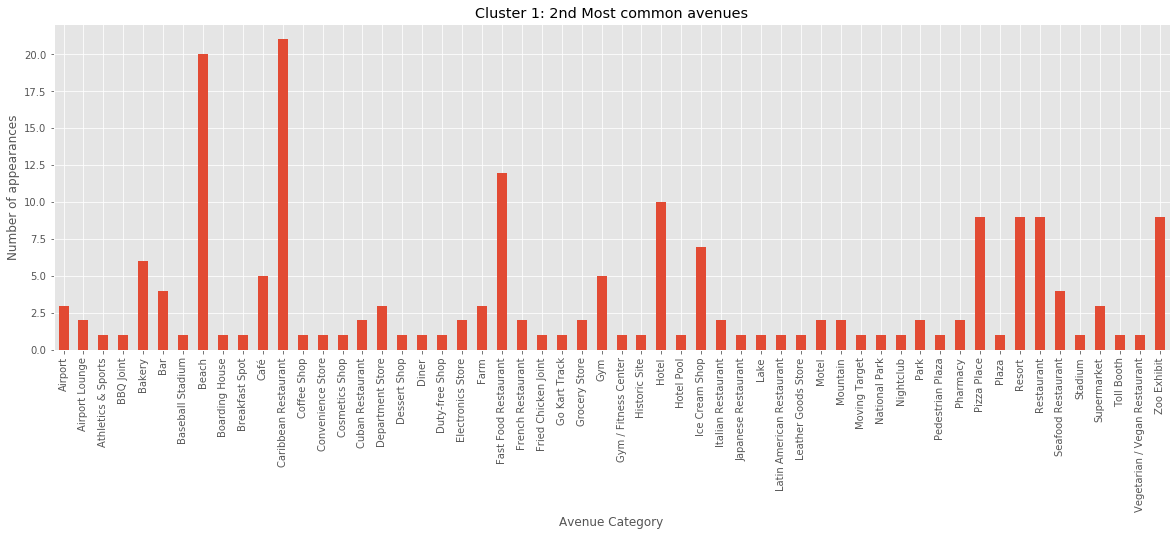

In [62]:
cluster1.groupby('2nd Most Common Venue').count()['City'].plot(kind='bar', figsize=(20, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 1: 2nd Most common avenues') # add title to the plot

plt.show()

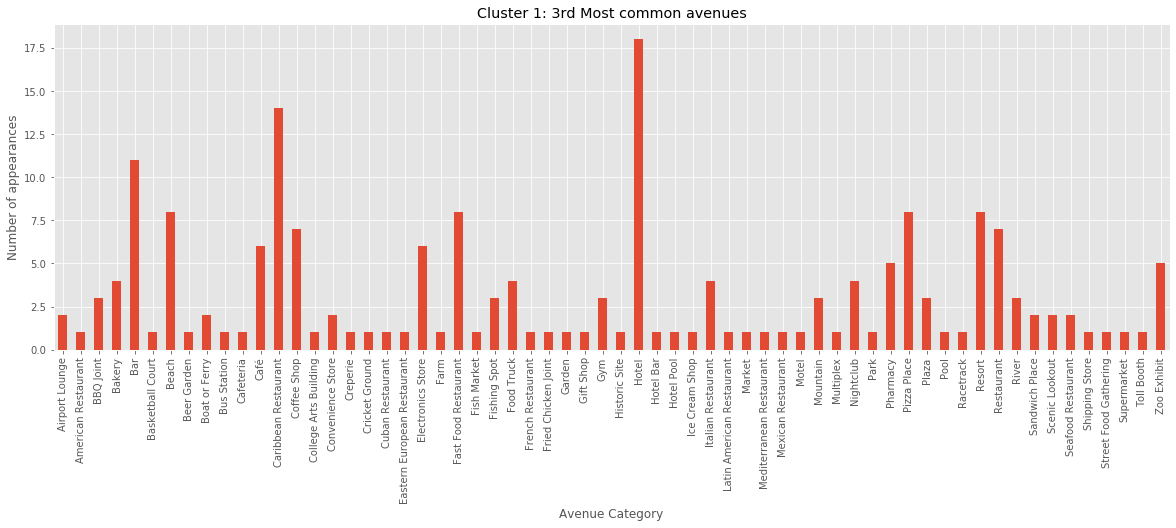

In [63]:
cluster1.groupby('3rd Most Common Venue').count()['City'].plot(kind='bar', figsize=(20, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 1: 3rd Most common avenues') # add title to the plot

plt.show()

Cluster 1 is mainly characterized by the big offer of beaches, Caribbean Restaurants, and pizza places. Restaurants and bars are definitely a big investment in the cities that belong to this cluster. 

#### Cluster 2

In [64]:
cluster2=caribbean_merged.loc[caribbean_merged['Cluster Labels'] == 2, caribbean_merged.columns[[1] + list(range(5, caribbean_merged.shape[1]))]]
cluster2

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Campechuela,Boat or Ferry,Airport,Flea Market,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
37,Cauto Cristo,Airport,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
49,Cruces,Airport,Botanical Garden,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
85,Manzanillo,Boat or Ferry,Airport,Flea Market,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
93,Nueva Gerona,Airport,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
105,Río Cauto,Outlet Store,Airport,Zoo Exhibit,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market


In [65]:
cluster2.shape

(6, 11)

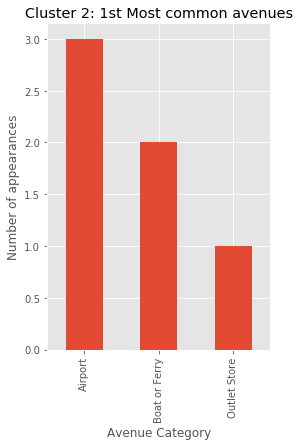

In [66]:
cluster2.groupby('1st Most Common Venue').count()['City'].plot(kind='bar', figsize=(4, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 2: 1st Most common avenues') # add title to the plot

plt.show()

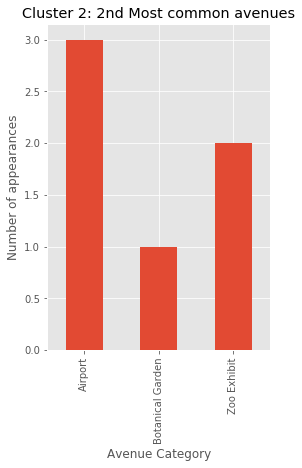

In [67]:
cluster2.groupby('2nd Most Common Venue').count()['City'].plot(kind='bar', figsize=(4, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 2: 2nd Most common avenues') # add title to the plot

plt.show()

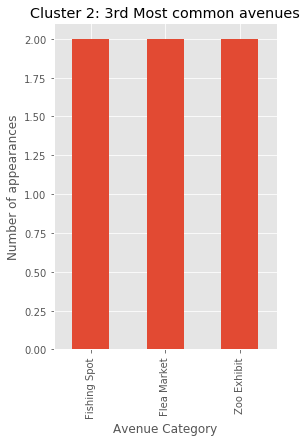

In [68]:
cluster2.groupby('3rd Most Common Venue').count()['City'].plot(kind='bar', figsize=(4, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 2: 3rd Most common avenues') # add title to the plot

plt.show()

Cluster 2 is characterized by their offer in Airports, zoo exhibition.

#### Cluster 3

In [69]:
cluster3=caribbean_merged.loc[caribbean_merged['Cluster Labels'] == 3, caribbean_merged.columns[[1] + list(range(5, caribbean_merged.shape[1]))]]
cluster3

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
88,Media Luna,Bed & Breakfast,Zoo Exhibit,Fishing Spot,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
92,Niquero,Park,Bed & Breakfast,Zoo Exhibit,Fish Market,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


Cluster 3 is characterized by their offer of Bed & Breakfast and Zoo Exhibition.

#### Cluster 4

In [70]:
cluster4=caribbean_merged.loc[caribbean_merged['Cluster Labels'] == 4, caribbean_merged.columns[[1] + list(range(5, caribbean_merged.shape[1]))]]
cluster4.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Abreus,Plaza,Cafeteria,Hotel,Pier,Theater,Fast Food Restaurant,Empanada Restaurant,Exhibit,Factory,Farm
14,Alamar,Hotel,Cuban Restaurant,Beach,Park,Hotel Bar,Nightclub,Restaurant,Plaza,Cocktail Bar,Seafood Restaurant
16,Amancio,Park,Antique Shop,Zoo Exhibit,Fish Market,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
17,Arroyo Naranjo,Cuban Restaurant,Park,Southern / Soul Food Restaurant,Zoo Exhibit,Fish & Chips Shop,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant
22,Baracoa,Cuban Restaurant,Beach,Park,Boat or Ferry,Boat Rental,Nightclub,Hotel,Scenic Lookout,Fish Market,Farm


In [71]:
cluster4.shape

(47, 11)

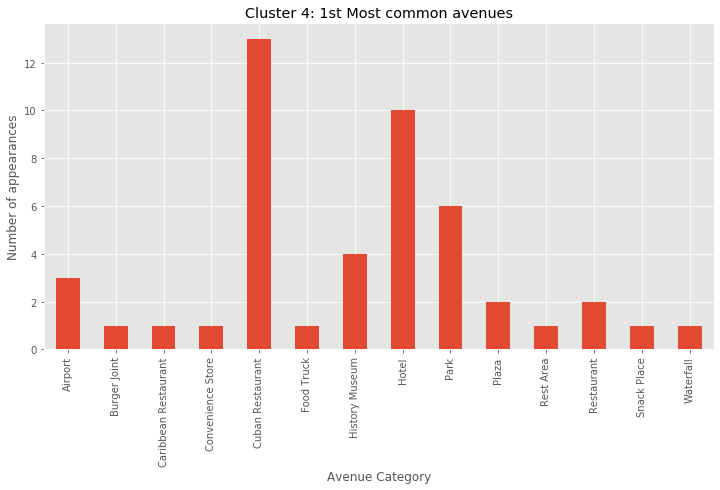

In [72]:
cluster4.groupby('1st Most Common Venue').count()['City'].plot(kind='bar', figsize=(12, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 4: 1st Most common avenues') # add title to the plot

plt.show()

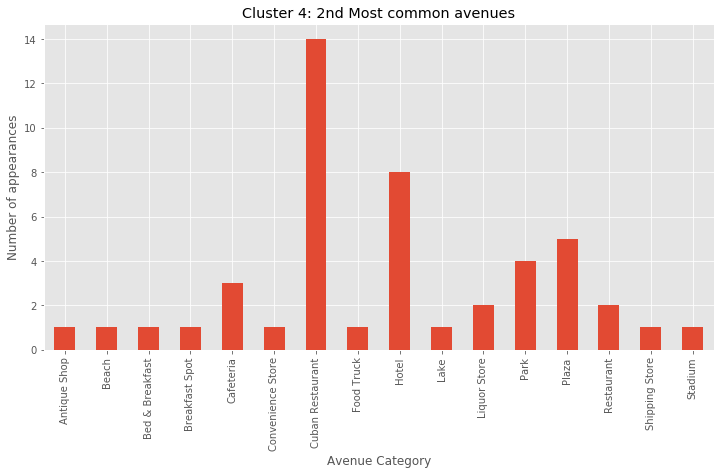

In [73]:
cluster4.groupby('2nd Most Common Venue').count()['City'].plot(kind='bar', figsize=(12, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 4: 2nd Most common avenues') # add title to the plot

plt.show()

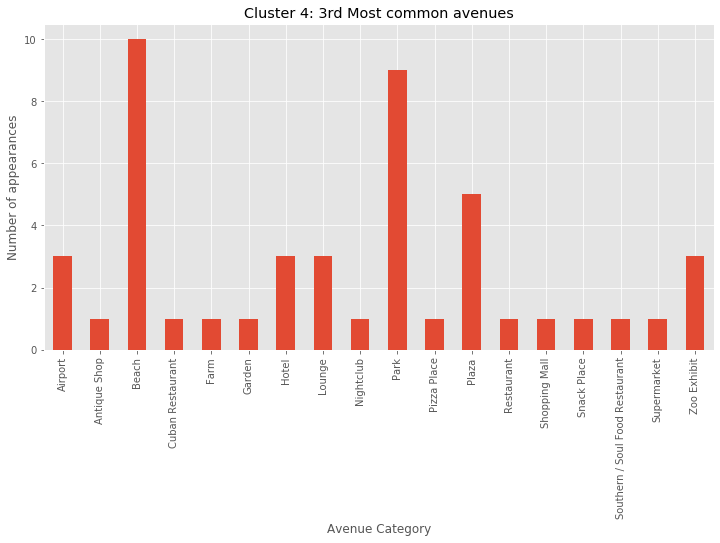

In [74]:
cluster4.groupby('3rd Most Common Venue').count()['City'].plot(kind='bar', figsize=(12, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 4: 3rd Most common avenues') # add title to the plot

plt.show()

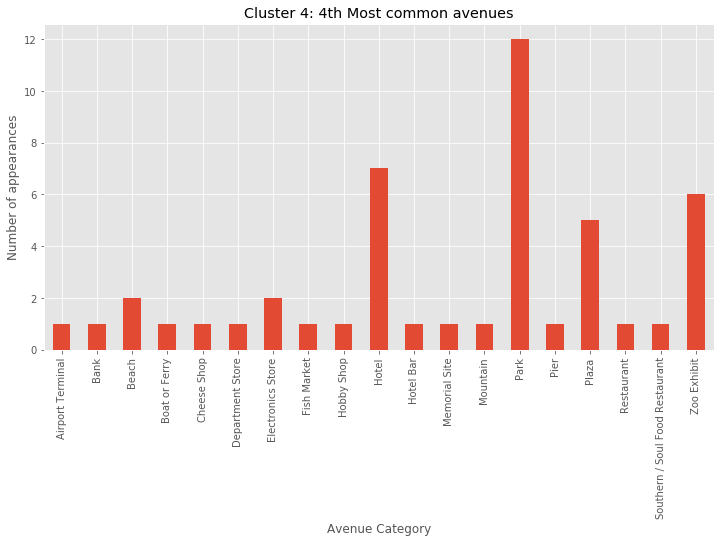

In [75]:
cluster4.groupby('4th Most Common Venue').count()['City'].plot(kind='bar', figsize=(12, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 4: 4th Most common avenues') # add title to the plot

plt.show()

Cluster 4 is mainly characterized by Cuban Restaurant, hotel offer and beaches.

#### Cluster 5

In [76]:
cluster5=caribbean_merged.loc[caribbean_merged['Cluster Labels'] == 5, caribbean_merged.columns[[1] + list(range(5, caribbean_merged.shape[1]))]]
cluster5

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Guantánamo,Burger Joint,Zoo Exhibit,Cricket Ground,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
63,Güines,Burger Joint,Zoo Exhibit,Cricket Ground,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
127,Yaguajay,Bar,Burger Joint,Zoo Exhibit,Empanada Restaurant,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market
129,Yateras,Burger Joint,Zoo Exhibit,Cricket Ground,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market


In [77]:
cluster5.shape

(4, 11)

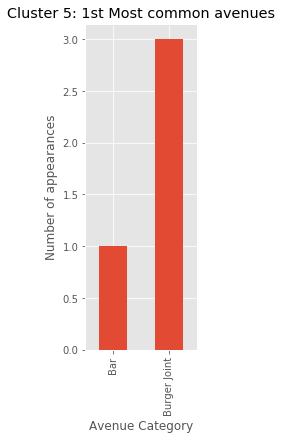

In [78]:
cluster5.groupby('1st Most Common Venue').count()['City'].plot(kind='bar', figsize=(2, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 5: 1st Most common avenues') # add title to the plot

plt.show()

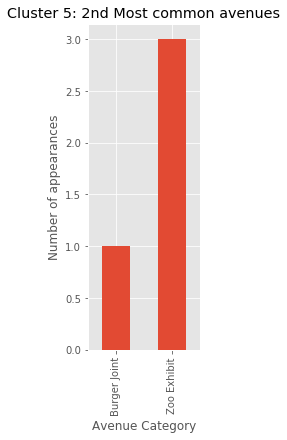

In [79]:
cluster5.groupby('2nd Most Common Venue').count()['City'].plot(kind='bar', figsize=(2, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 5: 2nd Most common avenues') # add title to the plot

plt.show()

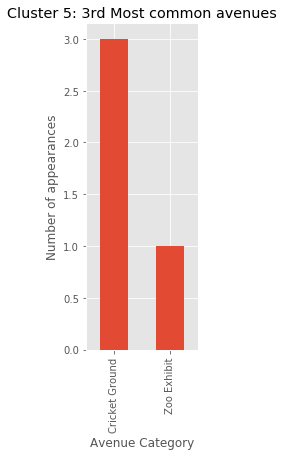

In [80]:
cluster5.groupby('3rd Most Common Venue').count()['City'].plot(kind='bar', figsize=(2, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 5: 3rd Most common avenues') # add title to the plot

plt.show()

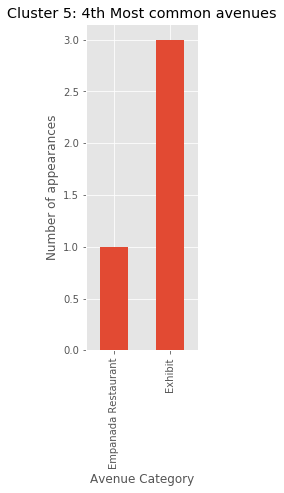

In [81]:
cluster5.groupby('4th Most Common Venue').count()['City'].plot(kind='bar', figsize=(2, 6))

plt.xlabel('Avenue Category') # add to x-label to the plot
plt.ylabel('Number of appearances') # add y-label to the plot
plt.title('Cluster 5: 4th Most common avenues') # add title to the plot

plt.show()

Cluster 5 is characterized by the offer of Burger joint, zoo exhibition and cricket ground.